#### single-label, binary class classification

In [1]:
# imorting necessary libraries
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the IMDB dataset in Keras and split data into train and test
# num_words=10000 means keep top 10,000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# Display content of one of the movie review in english
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
# Encoding the integer sequences into a binary matrix - one hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
#  network architecture
# Sequential class used only for linear stacks of layers
# functional API used for directed acyclic graphs of layers
model = models.Sequential()
# fully connected layer with 16 filters
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# fully connected layer with 16 filters
model.add(layers.Dense(16, activation='relu'))
# fully connected layer with 1 output classes
model.add(layers.Dense(1, activation='sigmoid'))

# compilation step
# binary crossentropy for a two-class classification problem
# categorical crossentropy for a many-class classification problem
# meansquared error for a regression problem
# connectionist temporal classification for a sequence-learning problem
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# training step
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,validation_data=(x_val, y_val))

# evaluation step
results = model.evaluate(x_test, y_test)

Epoch 1/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4668 - accuracy: 0.8206 - val_loss: 0.3477 - val_accuracy: 0.8684
Epoch 2/20
59/59 [==============================] - 1s 9ms/step - loss: 0.2624 - accuracy: 0.9088 - val_loss: 0.2795 - val_accuracy: 0.8891
Epoch 3/20
59/59 [==============================] - 1s 9ms/step - loss: 0.1942 - accuracy: 0.9313 - val_loss: 0.2813 - val_accuracy: 0.8867
Epoch 4/20
59/59 [==============================] - 1s 9ms/step - loss: 0.1538 - accuracy: 0.9484 - val_loss: 0.2844 - val_accuracy: 0.8880
Epoch 5/20
59/59 [==============================] - 0s 8ms/step - loss: 0.1246 - accuracy: 0.9590 - val_loss: 0.3239 - val_accuracy: 0.8738
Epoch 6/20
59/59 [==============================] - 1s 9ms/step - loss: 0.1025 - accuracy: 0.9684 - val_loss: 0.3340 - val_accuracy: 0.8823
Epoch 7/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0813 - accuracy: 0.9759 - val_loss: 0.3740 - val_accuracy: 0.8785
Epoch 8/20
59/59 [=

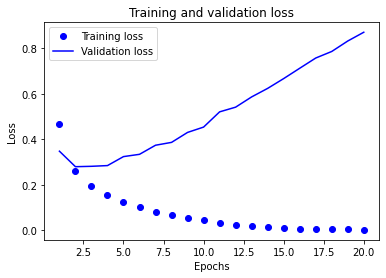

In [6]:
history_dict = history.history
acc = history_dict.get('accuracy')
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

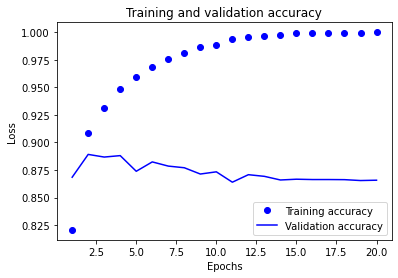

In [7]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
y_predicted = model.predict(x_test)
y_predicted[0]

782/782 [==============================] - 1s 2ms/step


array([0.00131347], dtype=float32)